In [1]:
!pip install numpy 
!pip install pandas 
!pip install matplotlib.pyplot 
!pip install statsmodels.api 
!pip install sklearn.model_selection 
!pip install statsmodels.tools.eval_measures 
!pip install sklearn.metrics
!pip install random 
!pip install seaborn 
!pip install sklearn.linear_model
!pip install sklearn.model_selection
!pip install statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# importing random lib for replace age values
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import mean

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
ERROR: Could not find a version that satisfies the requirement statsmodels.api (from versions: none)
ERROR: No matching distribution found for statsmodels.api
ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection
ERROR: Could not find a version that satisfies the requirement statsmodels.tools.eval_measures (from versions: none)
ERROR: No matching distribution found for statsmodels.tools.eval_measures
ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics
ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
ERROR: Could

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("DataScientist.csv")
df.head()

FileNotFoundError: ignored

In [ ]:
# df[df['Founded'] == df[df['Founded']!=-1]['Founded'].min()]

In [ ]:
df.rename(columns = {'Type of ownership':'Ownership','Salary Estimate':'Salary'}, inplace = True)
df.drop(['Unnamed: 0','index'],axis = 1, inplace = True)


In [ ]:
df[~df['Salary'].isin(["hour"])]['Salary'].unique()
df = df[~df['Salary'].isin(["hour"])]

In [ ]:
df['Salary'] = df['Salary'].apply(lambda x:x.split()[0])
df['Salary'] = df['Salary'].apply(lambda x:x.replace('$',''))
df['Salary'] = df['Salary'].apply(lambda x:x.replace('K',' '))
df['Salary'] = df['Salary'].apply(lambda x:x.replace('(Employer',' '))


In [ ]:
# df['Company Name'] = df['Company Name'].apply(lambda x:x.split('\n')[0])
# df['Company Name'].value_counts()

In [ ]:
def sim(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        tokens[1] = float(tokens[1])
        tokens[0] = float(tokens[0])
        diff = tokens[1] - tokens[0]
        
        rdm1 = tokens[0] + diff * np.random.uniform(0,1)
        rdm2 = tokens[0] + diff * np.random.uniform(0,1)
        rdm3 = tokens[0] + diff * np.random.uniform(0,1)
        
        av_rdm = (rdm1+rdm2+rdm3)/3
        return av_rdm
    try:
        return float(x)
    except:
        return None

# def sim(x):
#     tokens = x.split('-')
#     if len(tokens) == 2:
#         tokens[1] = float(tokens[1])
#         tokens[0] = float(tokens[0])
#         diff = tokens[1] - tokens[0]
#         av_rdm = tokens[0] + diff/2     
        
#         return av_rdm
#     try:
#         return float(x)
#     except:
#         return None
def title(x):    
    if ('Manager' or 'Lead' or 'Director' )in x:
        return 'Manager'
    elif 'Senior' in x:
        return 'Senior'
    elif 'Junior' in x:
        return 'Junior'
    elif ('Data Scientist' or 'AI Scientist') in x:
        return 'Data Scientist'
    elif 'Data Analyst' in x:
        return 'Data Analyst'
    elif ('Data Engineer' or 'Machine Learning Engineer')in x:
        return 'Data Engineer'
    elif 'Quant' in x:
        return 'Quant'
    else:
        return 'others'
    

In [ ]:
df['Salary'] = df['Salary'].apply(sim)


In [ ]:
df['Job Title'] = df['Job Title'].apply(title)
df.groupby(['Job Title']).mean()



Salary    Rating      Founded
Job Title                                        
Data Analyst    102.831675  3.201435  1381.748006
Data Engineer   100.469943  3.259346  1410.906542
Data Scientist  123.667533  3.303427  1517.853121
Junior          103.821733  4.234286  1874.857143
Manager         109.846415  3.201000  1582.740000
Quant            98.581766  3.505556  1622.638889
Senior          111.710661  3.335512  1561.934641
others          102.374823  3.271478  1479.792567

In [ ]:
df['Job Title']

0               Senior
1       Data Scientist
2              Manager
3         Data Analyst
4               others
             ...      
3904     Data Engineer
3905            Junior
3906     Data Engineer
3907     Data Engineer
3908            others
Name: Job Title, Length: 3909, dtype: object

Text(0, 0.5, 'Count')

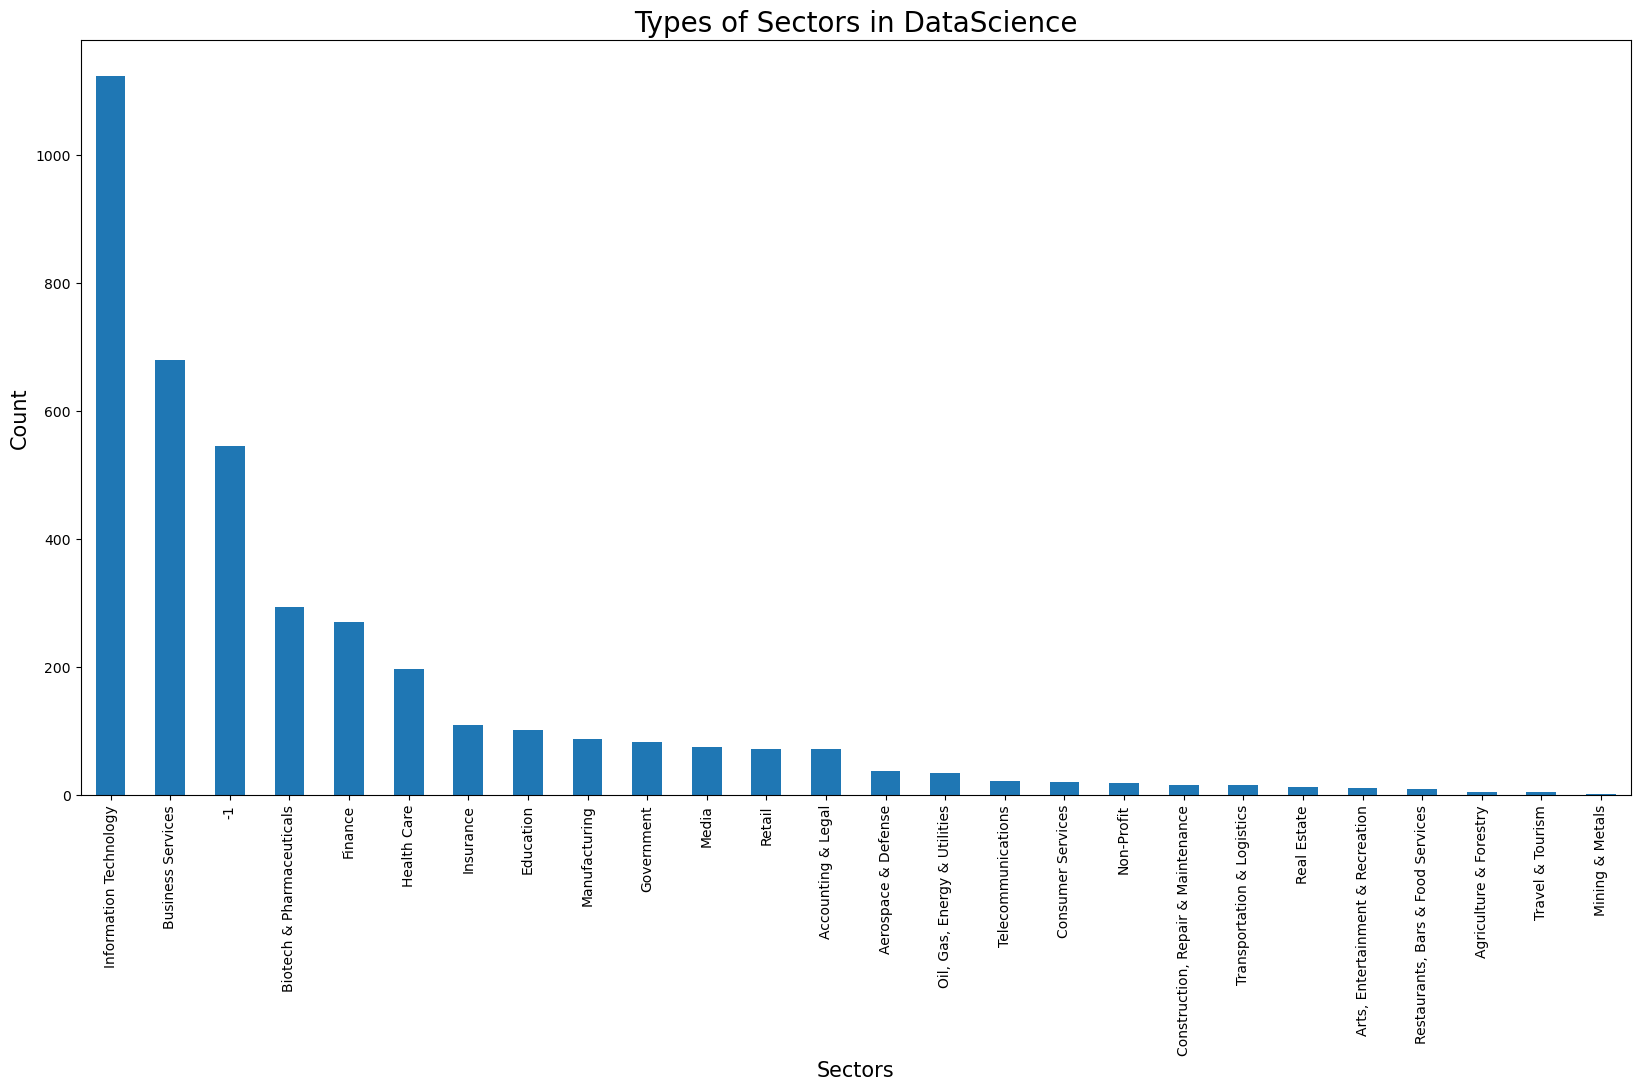

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
df["Sector"].value_counts().sort_values(ascending=False).plot.bar()
plt.title("Types of Sectors in DataScience",fontsize=20)
plt.xlabel("Sectors",fontsize=15)
plt.ylabel("Count",fontsize=15)


In [ ]:
#Size vs Salary
sns.set(rc= {"figure.figsize": (14, 10)})
sns.boxplot(x="Size", y="Salary", data=df,palette='rainbow')

In [ ]:
# Job Title, Job Description Salary Estimate, Rating, Company Name, Location, Revenue, Size, Type of ownership, Sector

In [ ]:
df_new = df[['Salary','Job Title','Job Description' , 'Rating', 'Founded','Company Name', 'Revenue',
       'Location', 'Headquarters', 'Size',  'Ownership',
       'Sector']]

df_new = df_new.drop([ 'Company Name', 'Headquarters' ], axis=1)
df_new

Salary       Job Title  \
0     146.913536          Senior   
1     140.268419  Data Scientist   
2     150.276411         Manager   
3     144.884812    Data Analyst   
4     140.649420          others   
...          ...             ...   
3904   80.041854   Data Engineer   
3905   88.705947          Junior   
3906   96.888208   Data Engineer   
3907   87.910436   Data Engineer   
3908   80.827584          others   

                                        Job Description  Rating  Founded  \
0     ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5     2007   
1     At Noom, we use scientifically proven methods ...     4.5     2008   
2     Decode_M\n\nhttps://www.decode-m.com/\n\nData ...    -1.0       -1   
3     Sapphire Digital seeks a dynamic and driven mi...     3.4     2019   
4     Director, Data Science - (200537)\nDescription...     3.4     2007   
...                                                 ...     ...      ...   
3904  About Us\n\nTachyon Technologies is a Digital ...     4.4     2011   
3905  Job description\nInterpret data, analyze resul...     5.0     2008   
3906  Job DescriptionThe Security Analytics Data Eng...     3.8     1977   
3907  The Security Analytics Data Engineer will inte...     4.0       -1   
3908  Help us transform patients' lives.\nAt UCB, we...     3.7       -1   

                         Revenue       Location                     Size  \
0       Unknown / Non-Applicable   New York, NY    501 to 1000 employees   
1       Unknown / Non-Applicable   New York, NY   1001 to 5000 employees   
2       Unknown / Non-Applicable   New York, NY        1 to 50 employees   
3       Unknown / Non-Applicable  Lyndhurst, NJ     201 to 500 employees   
4       Unknown / Non-Applicable   New York, NY      51 to 200 employees   
...                          ...            ...                      ...   
3904    $10 to $25 million (USD)     Dublin, OH     201 to 500 employees   
3905   $50 to $100 million (USD)   Columbus, OH      51 to 200 employees   
3906  $100 to $500 million (USD)     Dublin, OH  5001 to 10000 employees   
3907  Less than $1 million (USD)     Dublin, OH        1 to 50 employees   
3908      $2 to $5 billion (USD)     Slough, OH  5001 to 10000 employees   

              Ownership                     Sector  
0     Company - Private           Travel & Tourism  
1     Company - Private          Consumer Services  
2               Unknown                         -1  
3     Company - Private     Information Technology  
4     Company - Private          Business Services  
...                 ...                        ...  
3904  Company - Private     Information Technology  
3905  Company - Private     Information Technology  
3906  Company - Private          Business Services  
3907  Company - Private         Accounting & Legal  
3908   Company - Public  Biotech & Pharmaceuticals  

[3909 rows x 10 columns]

In [ ]:
df_new = df_new.replace('-1', np.nan)
df_new = df_new.replace(-1, np.nan)

df_new = df_new.dropna()
df_new['age'] = 2022-df_new['Founded']
df_new

Salary       Job Title  \
0     146.913536          Senior   
1     140.268419  Data Scientist   
3     144.884812    Data Analyst   
4     140.649420          others   
5     158.284361  Data Scientist   
...          ...             ...   
3902   80.590498          others   
3903   78.870846   Data Engineer   
3904   80.041854   Data Engineer   
3905   88.705947          Junior   
3906   96.888208   Data Engineer   

                                        Job Description  Rating  Founded  \
0     ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   2007.0   
1     At Noom, we use scientifically proven methods ...     4.5   2008.0   
3     Sapphire Digital seeks a dynamic and driven mi...     3.4   2019.0   
4     Director, Data Science - (200537)\nDescription...     3.4   2007.0   
5     Job Brief\n\nThe ideal candidate will have pre...     2.9   1985.0   
...                                                 ...     ...      ...   
3902  #Columbus Data Science Tutor Jobs\n\nVarsity T...     4.2   2007.0   
3903  ApTask is a leading staffing and recruitment c...     3.9   2010.0   
3904  About Us\n\nTachyon Technologies is a Digital ...     4.4   2011.0   
3905  Job description\nInterpret data, analyze resul...     5.0   2008.0   
3906  Job DescriptionThe Security Analytics Data Eng...     3.8   1977.0   

                         Revenue       Location                     Size  \
0       Unknown / Non-Applicable   New York, NY    501 to 1000 employees   
1       Unknown / Non-Applicable   New York, NY   1001 to 5000 employees   
3       Unknown / Non-Applicable  Lyndhurst, NJ     201 to 500 employees   
4       Unknown / Non-Applicable   New York, NY      51 to 200 employees   
5       Unknown / Non-Applicable   New York, NY     201 to 500 employees   
...                          ...            ...                      ...   
3902    Unknown / Non-Applicable   Columbus, OH     201 to 500 employees   
3903   $50 to $100 million (USD)     Dublin, OH     201 to 500 employees   
3904    $10 to $25 million (USD)     Dublin, OH     201 to 500 employees   
3905   $50 to $100 million (USD)   Columbus, OH      51 to 200 employees   
3906  $100 to $500 million (USD)     Dublin, OH  5001 to 10000 employees   

              Ownership                  Sector   age  
0     Company - Private        Travel & Tourism  15.0  
1     Company - Private       Consumer Services  14.0  
3     Company - Private  Information Technology   3.0  
4     Company - Private       Business Services  15.0  
5     Company - Private               Insurance  37.0  
...                 ...                     ...   ...  
3902  Company - Private  Information Technology  15.0  
3903  Company - Private  Information Technology  12.0  
3904  Company - Private  Information Technology  11.0  
3905  Company - Private  Information Technology  14.0  
3906  Company - Private       Business Services  45.0  

[2867 rows x 11 columns]

In [ ]:
#add new columns 

skill_labels = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'pytorch',
                'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

df_new[['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'pytorch',
                'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']] =0

df_new['Location'] = df_new['Location'].apply(lambda x : x.split(',')[1])

In [ ]:
for i in skill_labels:
    df_new[i] = df_new['Job Description'].apply( lambda x: int(i in x)  )
df_new = df_new.drop('Job Description', axis = 1)
df_new_new = df_new

Text(0.5, 1.0, 'Correlation Matrix')

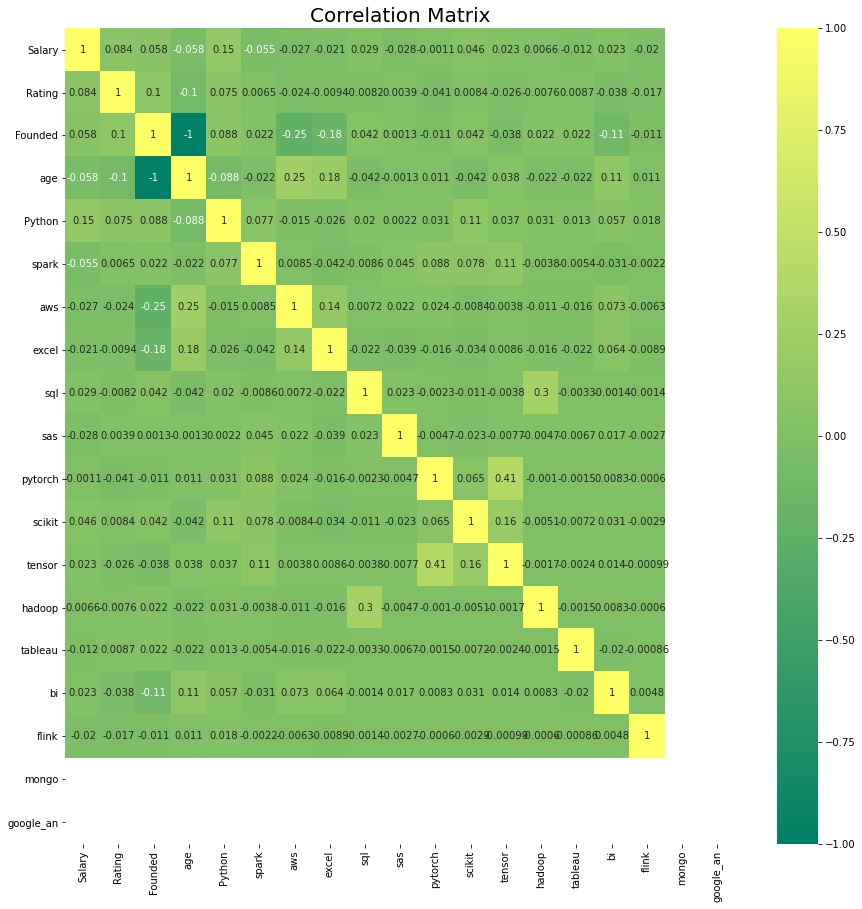

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_new.corr(),annot = True, cmap = 'summer')
ax.set_title("Correlation Matrix",fontsize=20)

In [ ]:
df_new_dum=pd.get_dummies(df_new,columns=['Job Title','Revenue',
       'Location', 'Size',  'Ownership','Sector'],drop_first=True)


In [ ]:
corr_target = df_new_dum.corr()['Salary']
def correlation(data, threshold):
    """
    Input: Dataframe and threshold
    Output: Returns a set of correlated features such that these features have a correlation greater than the
    specified threshold with at least one other independent feature 
    """
    corr_col = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                rowname = corr_matrix.index[j]
                if abs(corr_target[colname]) < abs(corr_target[rowname]):
                    corr_col.add(colname)
                else:
                    corr_col.add(rowname)
                
    return corr_col

In [ ]:
corr_features = correlation(df_new_dum.corr().drop(['Salary'],axis=1), 0.85)
#Remove features' correlation larger than 0.85
corr_features

{'Founded',
 'Ownership_Government',
 'Revenue_$10+ billion (USD)',
 'Size_10000+ employees'}

In [ ]:
#Remove high correlation features
df_new_dum = df_new_dum.drop(corr_features,axis = 1)

In [ ]:
df_new_dum.head()

Salary  Rating   age  Python  spark  aws  excel  sql  sas  pytorch  \
0  146.913536     3.5  15.0       0      0    0      0    0    0        0   
1  140.268419     4.5  14.0       1      0    0      1    0    0        0   
3  144.884812     3.4   3.0       1      0    0      0    0    0        0   
4  140.649420     3.4  15.0       1      0    0      0    0    0        0   
5  158.284361     2.9  37.0       1      0    0      0    0    0        0   

   ...  Sector_Manufacturing  Sector_Media  Sector_Non-Profit  \
0  ...                     0             0                  0   
1  ...                     0             0                  0   
3  ...                     0             0                  0   
4  ...                     0             0                  0   
5  ...                     0             0                  0   

   Sector_Oil, Gas, Energy & Utilities  Sector_Real Estate  \
0                                    0                   0   
1                                    0                   0   
3                                    0                   0   
4                                    0                   0   
5                                    0                   0   

   Sector_Restaurants, Bars & Food Services  Sector_Retail  \
0                                         0              0   
1                                         0              0   
3                                         0              0   
4                                         0              0   
5                                         0              0   

   Sector_Telecommunications  Sector_Transportation & Logistics  \
0                          0                                  0   
1                          0                                  0   
3                          0                                  0   
4                          0                                  0   
5                          0                                  0   

   Sector_Travel & Tourism  
0                        1  
1                        0  
3                        0  
4                        0  
5                        0  

[5 rows x 86 columns]

In [ ]:

from sklearn.model_selection import train_test_split

x = df_new_dum.drop(['Salary'], axis=1)
y = df_new_dum[['Salary']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)


In [ ]:
x.columns

Index(['Rating', 'age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas',
       'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink',
       'mongo', 'google_an', 'Job Title_Data Engineer',
       'Job Title_Data Scientist', 'Job Title_Junior', 'Job Title_Manager',
       'Job Title_Quant', 'Job Title_Senior', 'Job Title_others',
       'Revenue_$1 to $5 million (USD)', 'Revenue_$10 to $25 million (USD)',
       'Revenue_$100 to $500 million (USD)', 'Revenue_$2 to $5 billion (USD)',
       'Revenue_$25 to $50 million (USD)', 'Revenue_$5 to $10 billion (USD)',
       'Revenue_$5 to $10 million (USD)', 'Revenue_$50 to $100 million (USD)',
       'Revenue_$500 million to $1 billion (USD)',
       'Revenue_Less than $1 million (USD)',
       'Revenue_Unknown / Non-Applicable', 'Location_ CA', 'Location_ DE',
       'Location_ FL', 'Location_ IL', 'Location_ NJ', 'Location_ NY',
       'Location_ OH', 'Location_ PA', 'Location_ TX',
       'Location_ United Kingdom', 'Size_1001

In [ ]:
x

Rating   age  Python  spark  aws  excel  sql  sas  pytorch  scikit  ...  \
0        3.5  15.0       0      0    0      0    0    0        0       0  ...   
1        4.5  14.0       1      0    0      1    0    0        0       0  ...   
3        3.4   3.0       1      0    0      0    0    0        0       0  ...   
4        3.4  15.0       1      0    0      0    0    0        0       0  ...   
5        2.9  37.0       1      0    0      0    0    0        0       0  ...   
...      ...   ...     ...    ...  ...    ...  ...  ...      ...     ...  ...   
3902     4.2  15.0       0      0    0      0    0    0        0       0  ...   
3903     3.9  12.0       0      0    0      1    0    0        0       0  ...   
3904     4.4  11.0       0      0    0      0    0    0        0       0  ...   
3905     5.0  14.0       0      0    0      0    0    0        0       0  ...   
3906     3.8  45.0       1      0    0      1    0    0        0       0  ...   

      Sector_Manufacturing  Sector_Media  Sector_Non-Profit  \
0                        0             0                  0   
1                        0             0                  0   
3                        0             0                  0   
4                        0             0                  0   
5                        0             0                  0   
...                    ...           ...                ...   
3902                     0             0                  0   
3903                     0             0                  0   
3904                     0             0                  0   
3905                     0             0                  0   
3906                     0             0                  0   

      Sector_Oil, Gas, Energy & Utilities  Sector_Real Estate  \
0                                       0                   0   
1                                       0                   0   
3                                       0                   0   
4                                       0                   0   
5                                       0                   0   
...                                   ...                 ...   
3902                                    0                   0   
3903                                    0                   0   
3904                                    0                   0   
3905                                    0                   0   
3906                                    0                   0   

      Sector_Restaurants, Bars & Food Services  Sector_Retail  \
0                                            0              0   
1                                            0              0   
3                                            0              0   
4                                            0              0   
5                                            0              0   
...                                        ...            ...   
3902                                         0              0   
3903                                         0              0   
3904                                         0              0   
3905                                         0              0   
3906                                         0              0   

      Sector_Telecommunications  Sector_Transportation & Logistics  \
0                             0                                  0   
1                             0                                  0   
3                             0                                  0   
4                             0                                  0   
5                             0                                  0   
...                         ...                                ...   
3902                          0                                  0   
3903                          0                                  0   
3904                          0                                  0   
3905          

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(2293, 85) (2293, 1) (574, 85) (574, 1)


In [ ]:
x_train

Rating    age  Python  spark  aws  excel  sql  sas  pytorch  scikit  \
1476     4.1   26.0       1      0    1      0    0    0        0       0   
2160     4.5   12.0       1      0    0      0    0    0        0       0   
852      3.4  177.0       0      0    0      0    0    0        0       0   
3198     3.7   18.0       1      0    0      0    0    0        0       0   
1648     4.3  282.0       1      0    1      1    0    0        0       0   
...      ...    ...     ...    ...  ...    ...  ...  ...      ...     ...   
3763     3.1   93.0       1      0    0      1    0    0        0       0   
1205     3.7   15.0       1      0    0      1    0    0        0       0   
1463     3.6   32.0       1      0    0      0    0    0        0       0   
315      4.8   11.0       1      0    0      0    0    0        0       0   
1413     3.0   19.0       0      0    0      0    0    0        0       0   

      ...  Sector_Manufacturing  Sector_Media  Sector_Non-Profit  \
1476  ...                     0             0                  0   
2160  ...                     0             0                  0   
852   ...                     0             0                  0   
3198  ...                     0             0                  0   
1648  ...                     0             0                  0   
...   ...                   ...           ...                ...   
3763  ...                     0             0                  0   
1205  ...                     1             0                  0   
1463  ...                     0             0                  0   
315   ...                     0             0                  0   
1413  ...                     0             0                  0   

      Sector_Oil, Gas, Energy & Utilities  Sector_Real Estate  \
1476                                    0                   0   
2160                                    0                   0   
852                                     0                   0   
3198                                    0                   0   
1648                                    0                   0   
...                                   ...                 ...   
3763                                    0                   0   
1205                                    0                   0   
1463                                    0                   0   
315                                     0                   0   
1413                                    0                   0   

      Sector_Restaurants, Bars & Food Services  Sector_Retail  \
1476                                         0              0   
2160                                         0              0   
852                                          0              0   
3198                                         0              0   
1648                                         0              0   
...                                        ...            ...   
3763                                         0              0   
1205                                         0              0   
1463                                         0              0   
315                                          0              0   
1413                                         0              0   

      Sector_Telecommunications  Sector_Transportation & Logistics  \
1476                          0                                  0   
2160                          0                                  0   
852                           0                                  0   
3198                          0                                  0   
1648                          0                                  0   
...                         ...                                ...   
3763                          0                                  0   
1205                          0                                  0   
1463                          0                                  0   
31

In [ ]:
import random
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(x_train, y_train)
lm.score(x_train,y_train)

0.3200134042872159

In [ ]:
lm_pred = lm.predict(x_test)
lm_pred_rmse = np.sqrt(mean_squared_error(y_test, lm_pred))
lm_pred_rsquared = lm.score(x_test,y_test)
n = x_train.shape[0] 
p = x_train.shape[1]
lm_pred_rsquared_adj = 1 - (1-lm_pred_rsquared)*(n-1)/(n-p-1)

cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']
result_tabulation = pd.DataFrame(columns = cols)

linreg_full_metrics = pd.Series({'Model': "Linear Regression Model ",
                     'RMSE':lm_pred_rmse,
                     'R-Squared': lm_pred_rsquared,
                     'Adj. R-Squared': lm_pred_rsquared_adj     
                   })

result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

result_tabulation

<ipython-input-30-95115d11ed0e>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)


Model       RMSE R-Squared Adj. R-Squared
0  Linear Regression Model   34.344078  0.265652        0.23737

## Lasso

<ipython-input-31-381b2e16d7cc>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)


Model       RMSE R-Squared Adj. R-Squared
0  Linear Regression Model   34.344078  0.265652        0.23737
1                     Lasso  34.100945  0.276013        0.24813

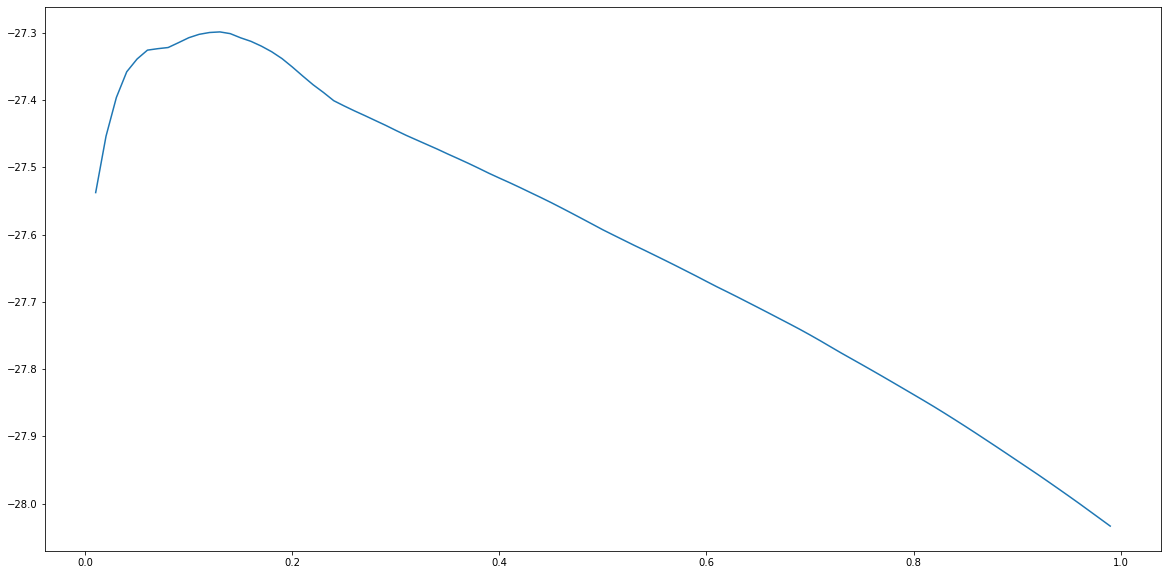

In [ ]:
lm_l = Lasso(alpha=.13)
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5)))

    plt.rcParams['figure.figsize'] = (20,10)    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]
best_lasso = Lasso(alpha=0.03)
best_lasso.fit(x_train,y_train)

pred_test_lasso= best_lasso.predict(x_test)
best_lasso_RMSE = np.sqrt(mean_squared_error(y_test,pred_test_lasso))
best_lasso_R2 = r2_score(y_test, pred_test_lasso)
n = x_train.shape[0] 
p = x_train.shape[1]
best_lasso_adj_R2 = 1- ((1-best_lasso_R2) * (n-1)/(n-p-1))
linreg_full_metrics = pd.Series({'Model': "Lasso",
                     'RMSE':best_lasso_RMSE,
                     'R-Squared': best_lasso_R2,
                     'Adj. R-Squared': best_lasso_adj_R2     
                   })
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

result_tabulation


In [ ]:
#OLS Regression
#import random

#linreg_full = sm.OLS(y_train, x_train).fit()
#random.seed(27)
#linreg_full.summary()


In [ ]:
#linreg_full_predictions = linreg_full.predict(x_test)
#linreg_full_rmse = rmse(y_test['Salary'],linreg_full_predictions )

#linreg_full_rsquared = linreg_full.rsquared

#linreg_full_rsquared_adj = linreg_full.rsquared_adj 

#cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']
#result_tabulation = pd.DataFrame(columns = cols)

#linreg_full_metrics = pd.Series({'Model': "OLS Regression Model ",
#                     'RMSE':linreg_full_rmse,
#                     'R-Squared': linreg_full_rsquared,
#                     'Adj. R-Squared': linreg_full_rsquared_adj     
#                       })

#result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

#result_tabulation

In [ ]:
#y_test['Salary'].index

In [ ]:
#linreg_full_predictions

In [ ]:
####
#def get_coef_table(lin_reg):
#    ''' lin_reg is a fitted statsmodels regression model
#    Return a dataframe containing coefficients, pvalues, and the confidence intervals
#    '''
#    err_series = lin_reg.params - lin_reg.conf_int()[0]
#    coef_df = pd.DataFrame({'varname': err_series.index.values[1:],
#                            'coef': lin_reg.params.values[1:],
#                            'ci_err': err_series.values[1:],
#                            'pvalue': lin_reg.pvalues.round(4).values[1:]
#                           })
#    return coef_df
###

In [ ]:
#coef_df = get_coef_table(linreg_full).round(2).sort_values(by='coef',key=abs,ascending=False)

In [ ]:
#coef_df_filter = coef_df[abs(coef_df['coef']) > 1]

In [ ]:
#fig = plt.figure(figsize = (16,6))
#ax = sns.barplot(x=coef_df_filter['varname'],y=coef_df_filter['coef'].values)
#plt.xticks(rotation=45, ha='right')
#ax.set_xlabel("Features")
#ax.set_ylabel("Coefficients")
#ax.set_title("Linear Regression - Feature Importances",fontsize = 20)

In [ ]:
#coef_df


In [ ]:
#coef_df_skill = coef_df
#coef_df_skill.info()

In [ ]:
# skill_labels = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
#                 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
# filtered_df = coef_df_skill[coef_df_skill['varname'].isin(skill_labels)]

In [ ]:
# filtered_df = coef_df_skill[coef_df_skill['varname'].isin(skill_labels)]

In [ ]:
# filtered_df

In [ ]:
# fig = plt.figure(figsize = (16,5))
# ax = sns.barplot(x=filtered_df['coef'].values,y=filtered_df['varname'])
# plt.xticks(rotation=45, ha='right')
# ax.set_xlabel("Coefficients")
# ax.set_ylabel("Features")
# ax.set_title("Job Skill - Feature Importances",fontsize = 20)

In [ ]:
# def dis_data(Rfunction, Bfunction, Rname, Bname, title):
#     plt.figure(figsize=(10,6))
#     ax1 = sns.distplot(Rfunction, hist = False, color = 'r', label = Rname)
#     ax1 = sns.distplot(Bfunction, hist = False, color = 'b', label = Bname)
#     plt.title(title)
#     plt.legend()
#     ax1.set_xlabel("Salary")
#     ax1.set_ylabel("Density")
#     plt.show()
#     plt.close()
def dis_data(Rfunction, Bfunction, Rname, Bname, title):
    plt.figure(figsize=(10,6))
    plt.scatter(y_test['Salary'], y_test['Salary'].index ,cmap='coolwarm', label = 'real values')
    plt.scatter(linreg_full_predictions, linreg_full_predictions.index,cmap='coolwarm',  label = 'predicted values')
    plt.title(title)
    plt.legend()
    plt.show()
    plt.close()

In [ ]:
# dis_data(y_test, linreg_full_predictions, 'Actual Values(train)', 'Predicted Values(train)', title = 'OLS Regression Model')

In [ ]:
# Decision Tree
# plt.hist(df_new['Salary'],density=True, bins = 10)
# np.arange(df_new['Salary'].min(), df_new['Salary'].max(), 15)
# np.arange(10,260,20)
# df_new
# a= np.linspace(10,260,20)
# a
np.arange(0,6,1)

array([0, 1, 2, 3, 4, 5])

In [ ]:
def new_sal(col):
    a= np.linspace(10,260,10)
    for i in range(0,len(a)):
        if col>=a[i] and col<=a[i+1]:
            return (str([a[i], a[i+1]]))
def new_rate(col):
    a = np.arange(0,6,1)
    for i in range(0, len(a)):
        if col>=a[i] and col<=a[i+1]:
            return (str([a[i], a[i+1]]))

df_new = df_new_new
df_new['Salary']= df_new['Salary'].apply(new_sal)  
df_new['Rating'] = df_new['Rating'].apply(new_rate)


In [ ]:
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
enc = ce.OrdinalEncoder()
df_new = enc.fit_transform(df_new)
X = df_new.drop(['Salary', 'age','Founded'], axis=1)
Y = df_new['Salary']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)


In [ ]:

decision_tree = DecisionTreeClassifier() 
decision_tree_model = decision_tree.fit(X_train, Y_train) 
Y_pred_DT = decision_tree_model.predict(X_test)

In [ ]:
linreg_full_metrics = pd.Series({'Model': "Decision_Tree",
                     'accuracy' : accuracy_score(Y_pred_DT, Y_test)
                   })

result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

result_tabulation


<ipython-input-53-cca6af1579ad>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)


Model       RMSE R-Squared Adj. R-Squared  accuracy
0  Linear Regression Model   34.344078  0.265652        0.23737       NaN
1                     Lasso  34.100945  0.276013        0.24813       NaN
2             Decision_Tree        NaN       NaN            NaN  0.236934

[Text(491.7745124992354, 533.5333333333333, 'X[3] <= 3.5\ngini = 0.812\nsamples = 2293\nvalue = [495, 266, 507, 519, 89, 33, 6, 367, 11]'),
 Text(155.3131333081879, 513.4, 'X[3] <= 2.5\ngini = 0.788\nsamples = 859\nvalue = [249, 212, 198, 46, 62, 31, 6, 55, 0]'),
 Text(89.37157223536127, 493.2666666666667, 'X[6] <= 11.5\ngini = 0.689\nsamples = 206\nvalue = [89, 23, 67, 8, 12, 6, 1, 0, 0]'),
 Text(75.35250672810308, 473.1333333333333, 'X[2] <= 8.5\ngini = 0.677\nsamples = 184\nvalue = [84, 22, 57, 6, 10, 4, 1, 0, 0]'),
 Text(66.00235483607894, 453.0, 'X[9] <= 0.5\ngini = 0.669\nsamples = 161\nvalue = [78, 19, 45, 6, 8, 4, 1, 0, 0]'),
 Text(55.3111849616702, 432.8666666666667, 'X[5] <= 5.0\ngini = 0.67\nsamples = 152\nvalue = [75, 19, 39, 6, 8, 4, 1, 0, 0]'),
 Text(44.91106671016147, 412.73333333333335, 'X[6] <= 3.5\ngini = 0.669\nsamples = 148\nvalue = [74, 19, 36, 6, 8, 4, 1, 0, 0]'),
 Text(27.023242537922034, 392.6, 'X[2] <= 5.5\ngini = 0.711\nsamples = 63\nvalue = [28, 5, 17, 3, 5, 

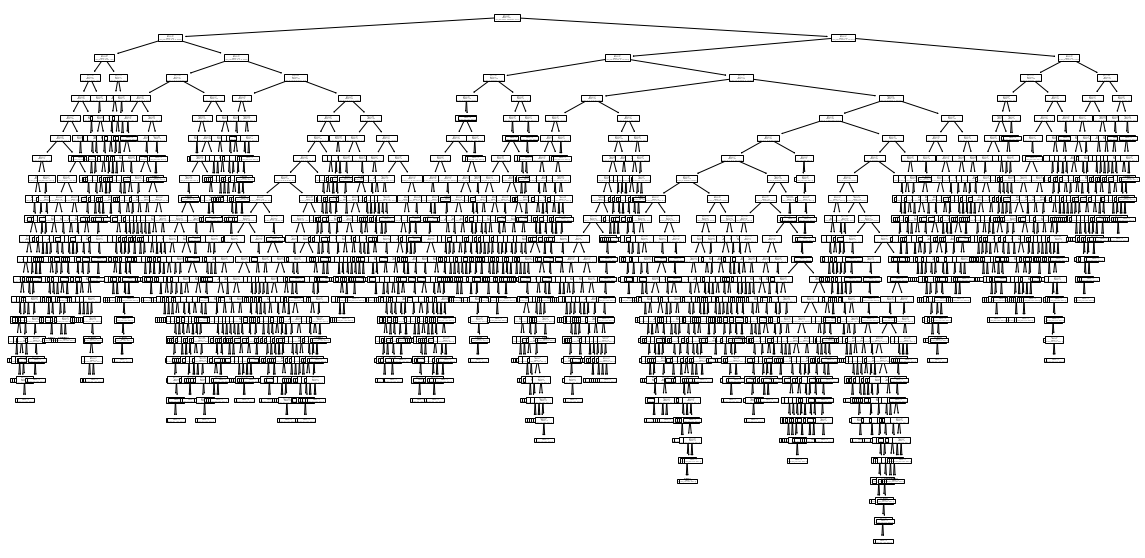

In [ ]:


from sklearn import tree

tree.plot_tree(decision_tree.fit(X_train, Y_train) ) 


In [ ]:
# import graphviz 
# dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
#                               feature_names=X_train.columns, 
#                               class_names=Y_train,  
                              
#                                )

# graph = graphviz.Source(dot_data) 

# graph 


In [ ]:
# max_depth = [2,8,10,20,30]
# max_leaf_nodes = [8,12,24,36,32]
# param_grid = {
#               'max_depth':max_depth,
#               'max_leaf_nodes':max_leaf_nodes
#              }
# dt_grid = DecisionTreeClassifier()
# dt_grid = GridSearchCV(
#                       estimator = dt_grid,
#                       param_grid = param_grid,
#                       cv = 5,
#                       scoring = 'accuracy'
#                       )
# dt_grid.fit(X_train,Y_train)

# dt_grid_params={}
# dt_grid_params = dt_grid.best_params_
# print(dt_grid.best_params_)
# dt_grid_params
# dt_grid.best_score_
# print(dt_grid.best_score_)
# dt_grid.fit(X_train, Y_train)
# dt_grid_pred = dt_grid_best.predict(X_test)

# linreg_full_metrics = pd.Series({'Model': "GridSearchCV in DT",
#                      'accuracy' : accuracy_score(dt_grid_pred, Y_test)
#                    })

# result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# result_tabulation


## Desision Tree after pruning

In [ ]:
prune = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 32 , random_state = 10)
decision_tree_prune = prune.fit(X_train, Y_train)
Y_pred_DT_prune=decision_tree_prune.predict(X_test)
linreg_full_metrics = pd.Series({'Model': "Decision Tree after pruning ",
                     'accuracy' : accuracy_score(Y_pred_DT_prune, Y_test)
                   })

result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

result_tabulation


<ipython-input-57-f04d92577bc0>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)


Model       RMSE R-Squared Adj. R-Squared  accuracy
0      Linear Regression Model   34.344078  0.265652        0.23737       NaN
1                         Lasso  34.100945  0.276013        0.24813       NaN
2                 Decision_Tree        NaN       NaN            NaN  0.236934
3  Decision Tree after pruning         NaN       NaN            NaN  0.353659

In [ ]:
# dis_data(y_test, y_pred_DT_prune, 'Actual Values', 'Predicted Values', title = 'Decision Tree Model after pruning')


In [ ]:
#import pydotplus 
#feature_names = [key for key in x_test  if not key=='quality']
#from IPython.display import Image
#dot_data = tree.export_graphviz(decision_tree_prune, out_file=None,feature_names=feature_names)
#import pydotplus

#graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

#Image(graph.create_png())

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_reg = RandomForestClassifier(n_estimators=100, random_state=10)

rf_reg.fit(X_train, Y_train)
Y_pred_RF = rf_reg.predict(X_test)

linreg_full_metrics = pd.Series({'Model': "Random Forest",
                     'accuracy' : accuracy_score(Y_pred_RF, Y_test)
                   })

result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

result_tabulation


<ipython-input-61-d6ca5694503d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)


Model       RMSE R-Squared Adj. R-Squared  accuracy
0      Linear Regression Model   34.344078  0.265652        0.23737       NaN
1                         Lasso  34.100945  0.276013        0.24813       NaN
2                 Decision_Tree        NaN       NaN            NaN  0.236934
3  Decision Tree after pruning         NaN       NaN            NaN  0.353659
4                 Random Forest        NaN       NaN            NaN  0.292683

## Random Forest(GridSearchCV)

In [ ]:
#
# Number of trees in random forest
n_estimators = [20,60,120,160]
max_features = [0.2,0.6, 0.8,1.0]
max_depth = [2,8,10,None]
max_samples = [0.5,0.75,0.8,1.0]
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'max_samples':max_samples
             }
rf_grid = RandomForestClassifier()
rf_grid = GridSearchCV(
                      estimator = rf_reg,
                      param_grid = param_grid,
                      cv = 5,
                      verbose = 2,
                      scoring = 'accuracy'
                      )
rf_grid.fit(X_train,Y_train)
rf_grid_params={}
rf_grid_params = rf_grid.best_params_
rf_grid_params
rf_grid.best_score_
rf_grid_best = RandomForestClassifier(max_depth= rf_grid_params['max_depth'], 
                                     max_features=rf_grid_params['max_features'],
                                     max_samples=rf_grid_params['max_samples'],
                                     n_estimators=rf_grid_params['n_estimators']
                                    )
rf_grid_best.fit(X_train, Y_train)
rf_grid_best_pred = rf_grid_best.predict(X_test)

linreg_full_metrics = pd.Series({'Model': "Random Forest(GridSearchCV)",
                     'accuracy' : accuracy_score(rf_grid_best_pred, Y_test)
                   })

result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

result_tabulation


{'n_estimators': [20, 60, 120, 160], 'max_features': [0.2, 0.6, 0.8, 1.0], 'max_depth': [2, 8, 10, None], 'max_samples': [0.5, 0.75, 0.8, 1.0]}
Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samp

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=120; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=120; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=120; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=160; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=160; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=160; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=160; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=160; total time=   0.0s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_est

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=2, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=2, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=2, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=2, max_features=0.8, max_samples=0.5, n_estima

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=2, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=2, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=2, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=2, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=2, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=2, max_features=1.0, max_samples=0.5, n_estima

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estima

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=8, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=0.2, max_samples=1.0, n_estimators=60; total time=   0.0s
[CV] END max_depth=8, max_features=0.2, max_samples=1.0, n_estimators=60; total time=   0.0s
[CV] END max_depth=8, max_features=0.2, max_samples=1.0, n_estimators=60; total time=   0.0s
[CV] END max_depth=8, max_features=0.2, max_samples=1.0, n_estimators=60; total time=   0.0s
[CV] END max_depth=8, max_features=0.2, max_samples=1.0, n_estimators=60; total time=   0.0s
[CV] END max_depth=8, max_features=0.2, max_samples=1.0, n_estimators=

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=8, max_features=0.8, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=8, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=8, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=8, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=8, max_features=0.8, max_samples=0.5, n_estimat

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=8, max_features=1.0, max_samples=0.5, n_estimato

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=10, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=10, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=10, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=10, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=10, max_features=0.2, max_samples=0.5

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=10, max_features=0.6, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, max_features=0.6, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.6, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=10, max_features=0.6, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=10, max_features=0.6, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=10, max_features=0.6, max_samples=0.5,

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=10, max_features=0.8, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=10, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=10, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=10, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=10, max_features=0.8, max_samples=0.5

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=10, max_features=1.0, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, max_features=1.0, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, max_samples=0.5,

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=None, max_feature

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=None, max_features=0.6, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=0.6, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.6, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=None, max_features=0.6, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=None, max_features=0.6, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=None, max_features

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=None, max_features=0.8, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, max_features=0.8, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.2s
[CV] END max_depth=None, max_features=0.8, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=None, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=None, max_features=0.8, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=None, max_features

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.2s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.2s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.2s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.2s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   0.2s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.4s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=120; total time=   0.3s
[CV] END max_depth=None, max_features=

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sk

<ipython-input-62-b4eeb2d3cc50>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)


Model       RMSE R-Squared Adj. R-Squared  accuracy
0      Linear Regression Model   34.344078  0.265652        0.23737       NaN
1                         Lasso  34.100945  0.276013        0.24813       NaN
2                 Decision_Tree        NaN       NaN            NaN  0.236934
3  Decision Tree after pruning         NaN       NaN            NaN  0.353659
4                 Random Forest        NaN       NaN            NaN  0.292683
5   Random Forest(GridSearchCV)        NaN       NaN            NaN  0.355401

In [ ]:
estimator_rf_best = rf_grid_best.estimators_[0]

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(estimator_rf_best, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = X.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

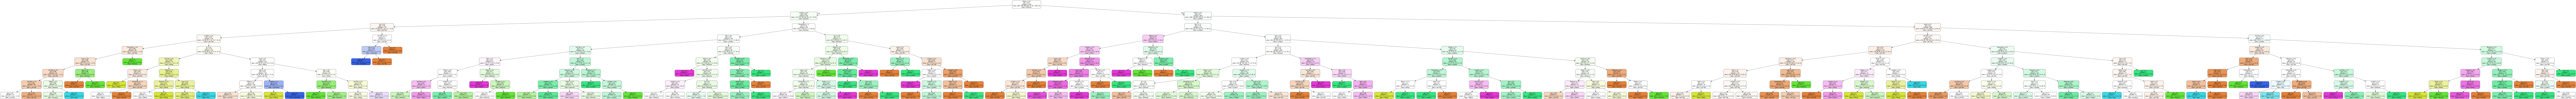

In [ ]:
from IPython.display import Image
Image(filename = 'tree.png')

<AxesSubplot:>

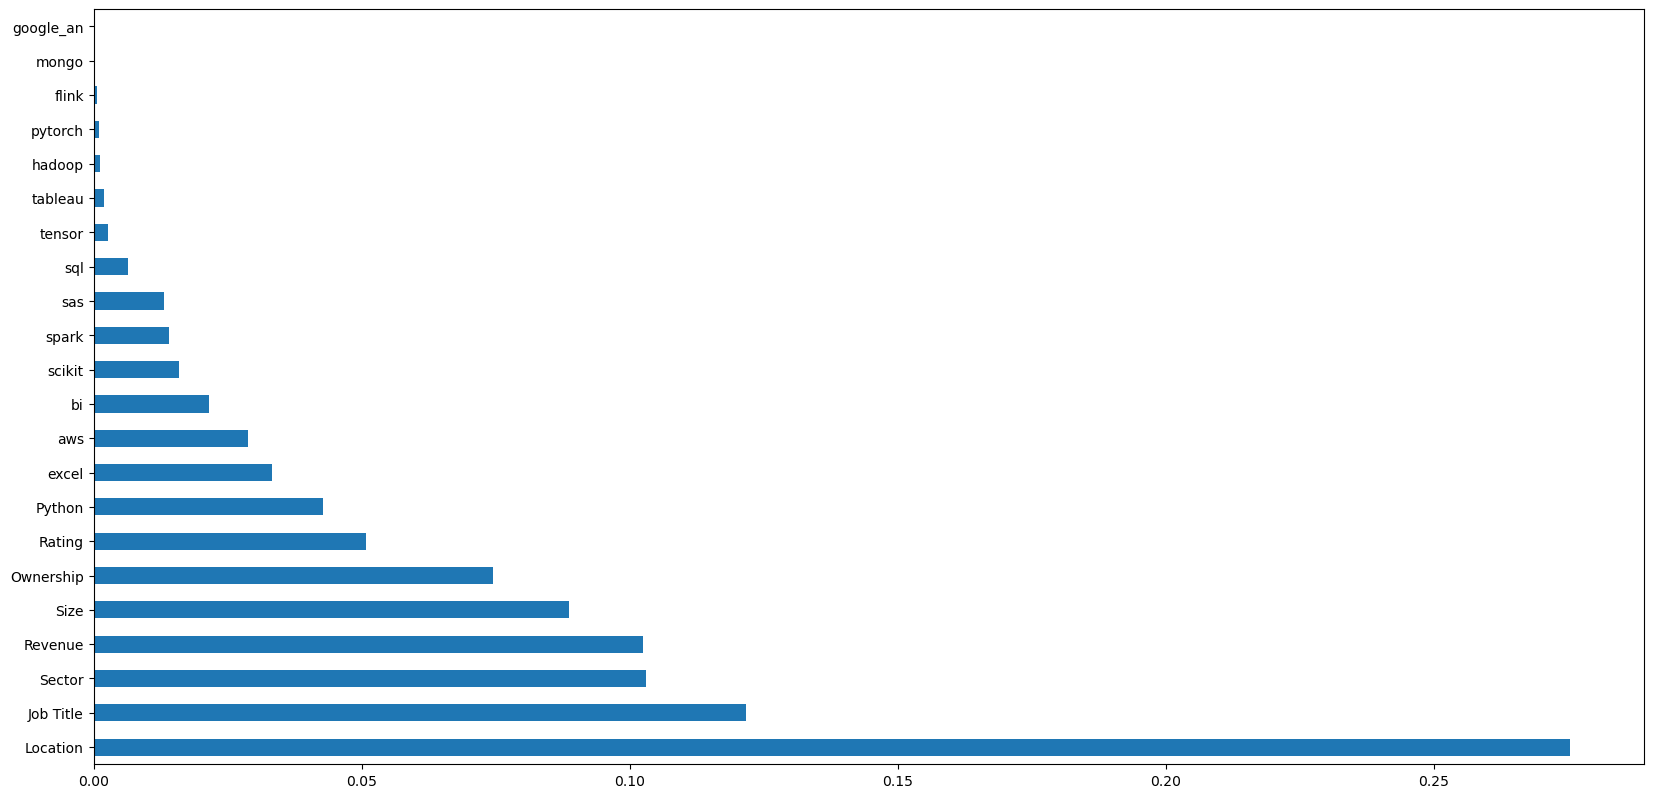

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
feat_importances = pd.Series(rf_grid_best.feature_importances_, index=X_test.columns)
feat_importances.nlargest(50).plot(kind='barh')



Text(0.5, 1.0, 'Top 10 Importance Features')

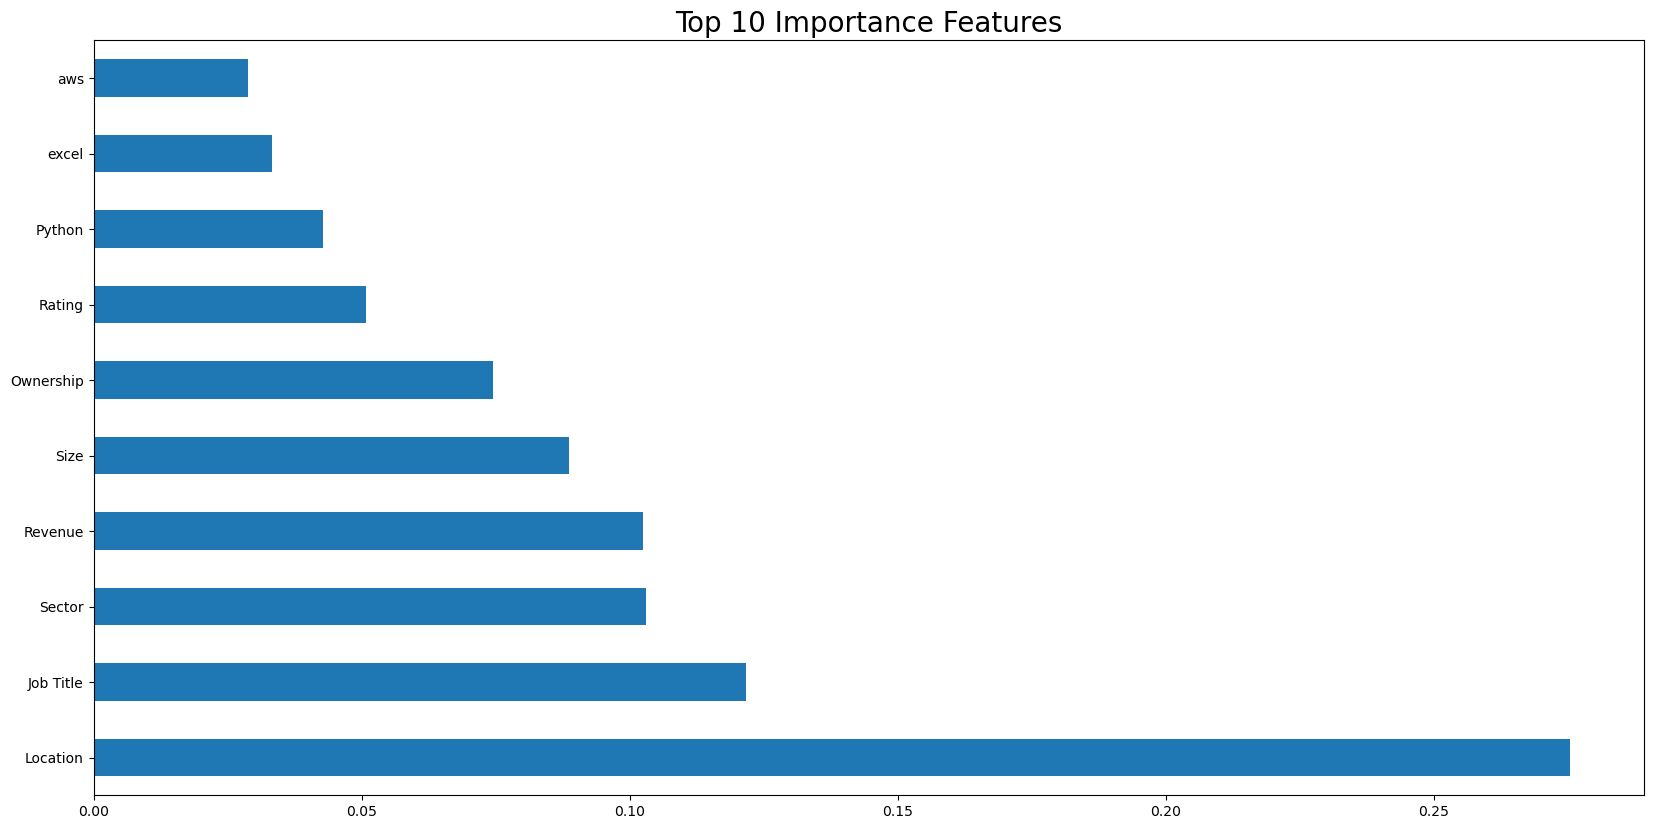

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
feat_importances = pd.Series(rf_grid_best.feature_importances_, index=X_test.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.set_title("Top 10 Importance Features",fontsize=20)


In [ ]:
feat_importances.round(5)

Job Title    0.12169
Rating       0.05086
Revenue      0.10240
Location     0.27537
Size         0.08875
Ownership    0.07444
Sector       0.10307
Python       0.04282
spark        0.01414
aws          0.02886
excel        0.03330
sql          0.00638
sas          0.01307
pytorch      0.00102
scikit       0.01597
tensor       0.00272
hadoop       0.00119
tableau      0.00191
bi           0.02150
flink        0.00054
mongo        0.00000
google_an    0.00000
dtype: float64

In [ ]:
skill_importance = pd.DataFrame(feat_importances.round(5),columns = ['Features Importance'])
#skill_importance['Features'] = skill_importance.index
skill_importance = skill_importance.reset_index(level=0)

In [ ]:
skill_labels = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
                 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
filtered_df = skill_importance[skill_importance['index'].isin(skill_labels)]
new_cols = ['Job Skills', 'Features Importance']
new_names_map = {filtered_df.columns[i]:new_cols[i] for i in range(len(new_cols))}
filtered_df.rename(new_names_map, axis=1, inplace=True)
filtered_df.sort_values(by='Features Importance',ascending=False)

<ipython-input-80-bc874295431b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(new_names_map, axis=1, inplace=True)


Job Skills  Features Importance
7      Python              0.04282
10      excel              0.03330
9         aws              0.02886
18         bi              0.02150
14     scikit              0.01597
8       spark              0.01414
12        sas              0.01307
11        sql              0.00638
15     tensor              0.00272
17    tableau              0.00191
16     hadoop              0.00119
13    pytorch              0.00102
19      flink              0.00054
20      mongo              0.00000
21  google_an              0.00000

In [ ]:
#dis_data(y_test, rf_grid_best_pred, 'Actual Values', 'Predicted Values', title = 'Random Forest(GridSearchCV)')


## XGBoosting

In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: Fu

In [ ]:
#
# Number of trees in random forest
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}

model_xgb = XGBClassifier()

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_xgb.fit(X_train, Y_train)

xgb_pred = model_xgb.predict(X_test)

linreg_full_metrics = pd.Series({'Model': "XGBoost(GridSearchCV)",
                     'accuracy' : accuracy_score(xgb_pred, Y_test)
                   })

result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

result_tabulation


<ipython-input-83-98cb6f4b4939>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)


Model       RMSE R-Squared Adj. R-Squared  accuracy
0      Linear Regression Model   34.344078  0.265652        0.23737       NaN
1                         Lasso  34.100945  0.276013        0.24813       NaN
2                 Decision_Tree        NaN       NaN            NaN  0.236934
3  Decision Tree after pruning         NaN       NaN            NaN  0.353659
4                 Random Forest        NaN       NaN            NaN  0.292683
5   Random Forest(GridSearchCV)        NaN       NaN            NaN  0.355401
6         XGBoost(GridSearchCV)        NaN       NaN            NaN  0.357143

## Catboost

In [ ]:
parameters = {
    'iterations': [5,  20, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 9, 11,25,50],
}

model_catboost = CatBoostClassifier(
    verbose=False,
)

model_catboost = GridSearchCV(
    model_catboost, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

act_pred = model_catboost.fit(X_train, Y_train)
act_pred = model_catboost.predict(X_test)


linreg_full_metrics = pd.Series({'Model': "CatBoost(GridSearchCV)",
                     'accuracy' : accuracy_score(act_pred, Y_test)
                   })

result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

result_tabulation


/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/catboost/core.py", line 4539, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/catboost/core.py", line 1904, in _fit
    train_params = self._prepare_train_params(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/catboost/core.py", line 1836, in _prepare_train_params
    _check_train_params(para

/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/catboost/core.py", line 4539, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/catboost/core.py", line 1904, in _fit
    train_params = self._prepare_train_params(
  File "/Users/sherlling/opt/anaconda3/lib/python3.8/site-packages/catboost/core.py", line 1836, in _prepare_train_params
    _check_train_params(para

<ipython-input-84-a20b0f92fa95>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)


Model       RMSE R-Squared Adj. R-Squared  accuracy
0      Linear Regression Model   34.344078  0.265652        0.23737       NaN
1                         Lasso  34.100945  0.276013        0.24813       NaN
2                 Decision_Tree        NaN       NaN            NaN  0.236934
3  Decision Tree after pruning         NaN       NaN            NaN  0.353659
4                 Random Forest        NaN       NaN            NaN  0.292683
5   Random Forest(GridSearchCV)        NaN       NaN            NaN  0.355401
6         XGBoost(GridSearchCV)        NaN       NaN            NaN  0.357143
7        CatBoost(GridSearchCV)        NaN       NaN            NaN  0.353659